In [86]:
import xgboost as xgb
import pandas as pd
import numpy as np
loaded_model = xgb.XGBRegressor()
loaded_model.load_model('xgboost_model.json')
import joblib
shap.initjs()

In [95]:
import shap
import numpy as np
import pandas as pd

# Initialize JavaScript visualization code for SHAP
shap.initjs()

# Your instance as a NumPy array
X = np.array([90,1,77,24.3,0,1,1,72,1,0,3])
#load scaler with joblib
scaler = joblib.load('scaler.joblib')
X = X.reshape(1, -1)


# Define your feature names
feature_names = ['age','sex','weight','bmi','hereditary_diseases','no_of_dependents','smoker','bloodpressure','diabetes','regular_ex','job_title']

# Convert your instance into a pandas DataFrame
df = pd.DataFrame(X, columns=feature_names)
df_og = df.copy()
df = scaler.transform(df)
df = pd.DataFrame(df, columns=feature_names)
print(df)
df.head()


        age       sex    weight       bmi  hereditary_diseases  \
0  3.580551  1.023128  0.907576 -0.963778            -0.232546   

   no_of_dependents    smoker  bloodpressure  diabetes  regular_ex  job_title  
0         -0.086982  2.014277       0.173823  0.522471   -0.534724  -1.090862  


,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,job_title
0,3.580551,1.023128,0.907576,-0.963778,-0.232546,-0.086982,2.014277,0.173823,0.522471,-0.534724,-1.090862


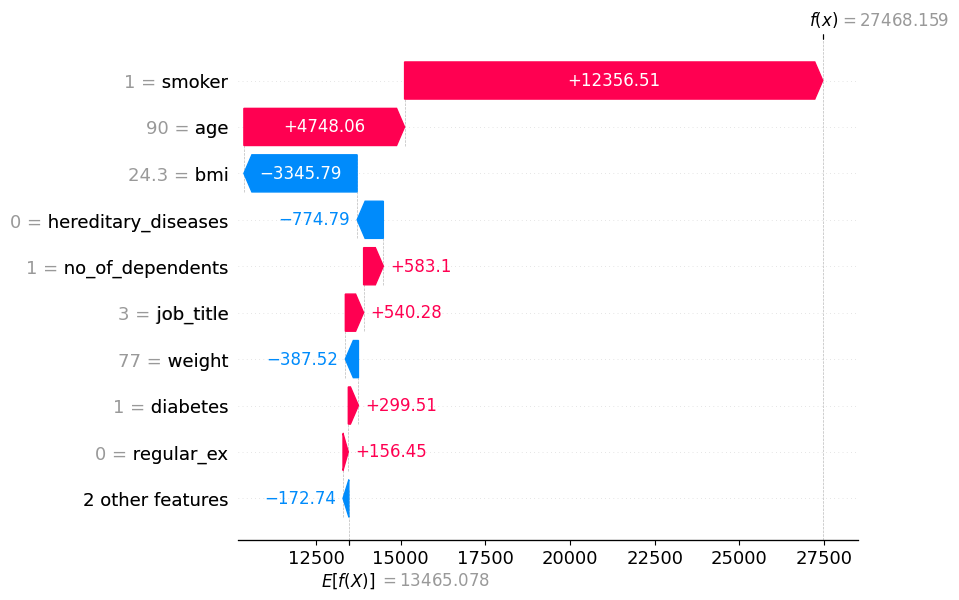

In [96]:
explainer = shap.TreeExplainer(loaded_model)
shap_values = explainer.shap_values(df)

# Create a SHAP Explanation object
shap_values_explanation = shap_values_explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, data=df_og)

# Create a waterfall plot
shap.plots.waterfall(shap_values_explanation[0])


In [1]:
print('SHAP values:', shap_values)

NameError: name 'shap_values' is not defined